#### Architecture of a CNN
1. Input images - target images we want to discover patterns in
2. Input layer - takes in image shape such as batch size, image height, width, color channels
3. Convolutional layer - extracts/learns the most important features in a image
4. Hidden layer - adds non-linearity to learned features
5. Pooling layer - reduces the dimensionality of learned image features
6. Fully connected layer - further reduces learned features from convolutional layers
7. Output layer - takes learned features and outputs them
8. Output activation - adds non-linearity to output features


In [1]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()


--2023-07-30 01:18:07--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.175.128, 74.125.24.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.175.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  15.3MB/s    in 7.1s    

2023-07-30 01:18:15 (14.8 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
# Understanding the data
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [5]:
import os
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class

  random_image=random.sample(os.listdir(target_folder),1)

  img = mpimg.imread(target_folder + '/' +random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

Image shape: (512, 512, 3)


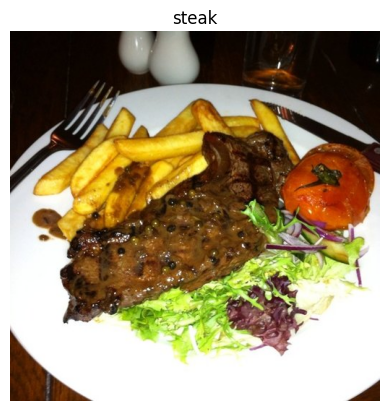

In [7]:
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class = 'steak')

In [8]:
img

array([[[ 6,  2,  0],
        [ 7,  3,  0],
        [ 7,  3,  0],
        ...,
        [ 4,  3,  1],
        [ 4,  3,  1],
        [ 4,  3,  1]],

       [[ 7,  3,  0],
        [ 8,  4,  1],
        [ 8,  4,  1],
        ...,
        [ 4,  3,  1],
        [ 4,  3,  1],
        [ 5,  4,  2]],

       [[ 7,  3,  0],
        [ 8,  4,  1],
        [ 8,  4,  1],
        ...,
        [ 5,  4,  2],
        [ 5,  4,  2],
        [ 5,  4,  2]],

       ...,

       [[65, 27,  4],
        [65, 27,  4],
        [64, 26,  5],
        ...,
        [50, 23,  2],
        [51, 24,  3],
        [52, 25,  4]],

       [[68, 27,  5],
        [67, 26,  4],
        [65, 27,  4],
        ...,
        [49, 24,  2],
        [49, 24,  2],
        [49, 24,  2]],

       [[69, 28,  6],
        [68, 27,  5],
        [65, 27,  4],
        ...,
        [53, 28,  6],
        [52, 27,  5],
        [51, 26,  4]]], dtype=uint8)

In [9]:
img.shape

(512, 512, 3)

In [10]:
# Normalize the images(between 0 and 1) For RGB colors the images are between 0 and 255
img/255.

array([[[0.02352941, 0.00784314, 0.        ],
        [0.02745098, 0.01176471, 0.        ],
        [0.02745098, 0.01176471, 0.        ],
        ...,
        [0.01568627, 0.01176471, 0.00392157],
        [0.01568627, 0.01176471, 0.00392157],
        [0.01568627, 0.01176471, 0.00392157]],

       [[0.02745098, 0.01176471, 0.        ],
        [0.03137255, 0.01568627, 0.00392157],
        [0.03137255, 0.01568627, 0.00392157],
        ...,
        [0.01568627, 0.01176471, 0.00392157],
        [0.01568627, 0.01176471, 0.00392157],
        [0.01960784, 0.01568627, 0.00784314]],

       [[0.02745098, 0.01176471, 0.        ],
        [0.03137255, 0.01568627, 0.00392157],
        [0.03137255, 0.01568627, 0.00392157],
        ...,
        [0.01960784, 0.01568627, 0.00784314],
        [0.01960784, 0.01568627, 0.00784314],
        [0.01960784, 0.01568627, 0.00784314]],

       ...,

       [[0.25490196, 0.10588235, 0.01568627],
        [0.25490196, 0.10588235, 0.01568627],
        [0.25098039, 0

#### Working with CNN
1. Load the images
2. Preprocess the images
3. Build a CNN to find patterns
4. Compile the CNN
5. Fit the CNN to the target data

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(42)

#Preprocess the data(get all pixel values to 0 and 1)
train_datagen = ImageDataGenerator(rescale=1./255.)
validation_datagen = ImageDataGenerator(rescale=1./255.)

#setup train and test directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

#Import data from directories and put them into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

validation_data = validation_datagen.flow_from_directory(test_dir,
                                                         batch_size=32,
                                                         target_size=(224, 224),
                                                         class_mode='binary',
                                                         seed=42)

#Build a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#Fit the model
history_1 = model_1.fit(train_data,
                        epochs = 10,
                        steps_per_epoch=len(train_data),
                        validation_data=validation_data,
                        validation_steps=len(validation_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
47/47 [==============================] - 18s 145ms/step - loss: 0.6072 - accuracy: 0.6767 - val_loss: 0.5078 - val_accuracy: 0.7520
Epoch 2/10
47/47 [==============================] - 7s 146ms/step - loss: 0.4622 - accuracy: 0.7933 - val_loss: 0.3732 - val_accuracy: 0.8420
Epoch 3/10
47/47 [==============================] - 6s 117ms/step - loss: 0.3984 - accuracy: 0.8273 - val_loss: 0.3398 - val_accuracy: 0.8500
Epoch 4/10
47/47 [==============================] - 6s 137ms/step - loss: 0.3530 - accuracy: 0.8467 - val_loss: 0.3440 - val_accuracy: 0.8640
Epoch 5/10
47/47 [==============================] - 6s 119ms/step - loss: 0.3474 - accuracy: 0.8473 - val_loss: 0.3317 - val_accuracy: 0.8740
Epoch 6/10
47/47 [==============================] - 6s 122ms/step - loss: 0.2859 - accuracy: 0.8827 - val_loss: 0.3146 - val_accuracy: 0.8560
Epoch 7/10
47/47 [==============================] - 6s 127ms/ste

In [12]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

#### Use neural network classification model for the image classification

In [13]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2 = model_2.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=validation_data,
            validation_steps=len(validation_data))

Epoch 1/5
47/47 [==============================] - 7s 114ms/step - loss: 0.9428 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 122ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 111ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 124ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 107ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [14]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Try improving model_2
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_3 = model_3.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=validation_data,
            validation_steps=len(validation_data))

Epoch 1/5
47/47 [==============================] - 8s 130ms/step - loss: 2.3227 - accuracy: 0.6573 - val_loss: 0.8923 - val_accuracy: 0.6740
Epoch 2/5
47/47 [==============================] - 5s 106ms/step - loss: 1.0753 - accuracy: 0.7047 - val_loss: 0.8720 - val_accuracy: 0.7400
Epoch 3/5
47/47 [==============================] - 6s 125ms/step - loss: 0.9728 - accuracy: 0.6847 - val_loss: 0.8356 - val_accuracy: 0.7060
Epoch 4/5
47/47 [==============================] - 5s 109ms/step - loss: 0.4308 - accuracy: 0.8053 - val_loss: 0.4548 - val_accuracy: 0.7860
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.5831 - accuracy: 0.7627 - val_loss: 1.1535 - val_accuracy: 0.6640


In [16]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


The CNN works so much better than the neural network classification.

### Working step by step with the CNN

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


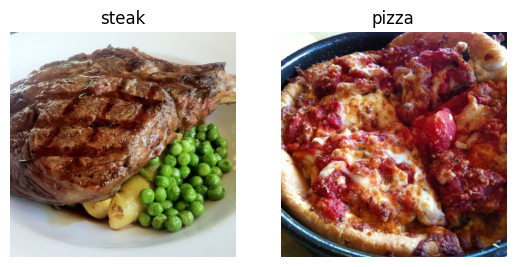

In [17]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train/','steak')
plt.subplot(1,2,2)
pizza_img = view_random_image('pizza_steak/train/','pizza')

In [18]:
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test'

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [20]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                            target_size=(224,224),
                                            class_mode='binary',
                                            batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [21]:
images, labels=train_data.next()

In [22]:
images

array([[[[0.08627451, 0.04313726, 0.05882353],
         [0.1137255 , 0.06666667, 0.07450981],
         [0.14901961, 0.09019608, 0.07843138],
         ...,
         [0.0509804 , 0.02745098, 0.03529412],
         [0.0509804 , 0.02745098, 0.03529412],
         [0.0509804 , 0.02745098, 0.03529412]],

        [[0.1254902 , 0.09019608, 0.05490196],
         [0.16862746, 0.11764707, 0.08627451],
         [0.22352943, 0.15686275, 0.1254902 ],
         ...,
         [0.0509804 , 0.02745098, 0.03529412],
         [0.0509804 , 0.02745098, 0.03529412],
         [0.0509804 , 0.02745098, 0.03529412]],

        [[0.13725491, 0.10196079, 0.04313726],
         [0.18039216, 0.1254902 , 0.07450981],
         [0.227451  , 0.16470589, 0.10588236],
         ...,
         [0.05882353, 0.02352941, 0.03529412],
         [0.05882353, 0.02352941, 0.03529412],
         [0.05882353, 0.02352941, 0.03529412]],

        ...,

        [[0.9490197 , 0.9607844 , 0.8941177 ],
         [0.9921569 , 1.        , 0.9490197 ]

In [23]:
labels

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [24]:
len(images), len(labels)

(32, 32)

In [25]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam

In [26]:
from keras.layers.attention.multi_head_attention import activation
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224,224,3)),
    Conv2D(10,3, activation='relu'),
    Conv2D(10,3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

1. Filters - decides how many filters should pass over an input tensor. eg- 10, 32, 64, 128
2. Kernel size - decides the shape of filters over the output. eg - 3, 5, 7
3. Padding - pads the target tensors with zeros. eg - same or valid
4. Strides - the number of steps filter takes across an image at a time


In [27]:
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [28]:
history_4=model_4.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data = test_data,
            validation_steps=len(test_data)
            )

Epoch 1/5
47/47 [==============================] - 8s 133ms/step - loss: 1.4216 - accuracy: 0.5973 - val_loss: 0.5514 - val_accuracy: 0.7280
Epoch 2/5
47/47 [==============================] - 6s 127ms/step - loss: 0.5208 - accuracy: 0.7367 - val_loss: 0.4760 - val_accuracy: 0.7900
Epoch 3/5
47/47 [==============================] - 7s 146ms/step - loss: 0.4085 - accuracy: 0.8280 - val_loss: 0.4268 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 6s 118ms/step - loss: 0.2926 - accuracy: 0.8807 - val_loss: 0.4759 - val_accuracy: 0.7580
Epoch 5/5
47/47 [==============================] - 6s 134ms/step - loss: 0.1583 - accuracy: 0.9587 - val_loss: 0.3484 - val_accuracy: 0.8560


In [29]:
import pandas as pd
pd.DataFrame(history_4.history)

,loss,accuracy,val_loss,val_accuracy
0,1.421563,0.597333,0.551372,0.728
1,0.520779,0.736667,0.475956,0.790
2,0.408549,0.828000,0.426768,0.834
3,0.292594,0.880667,0.475943,0.758
4,0.158310,0.958667,0.348383,0.856


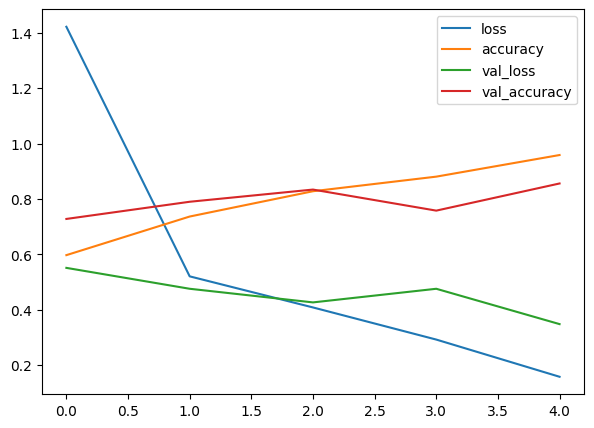

In [30]:
pd.DataFrame(history_4.history).plot(figsize=(7,5));

In [31]:
model_4.evaluate(test_data)

16/16 [==============================] - 1s 79ms/step - loss: 0.3484 - accuracy: 0.8560


[0.3483825922012329, 0.8560000061988831]

In [32]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [36]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='Training accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


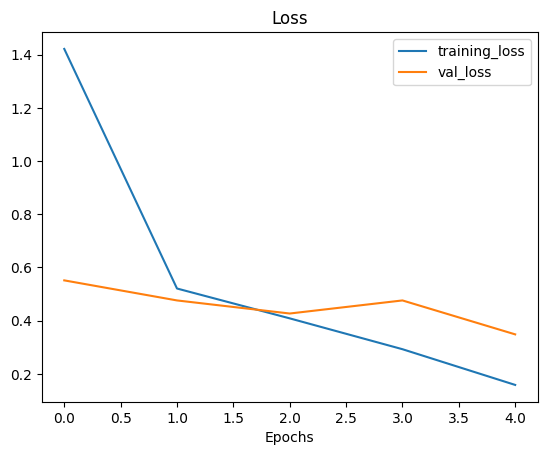

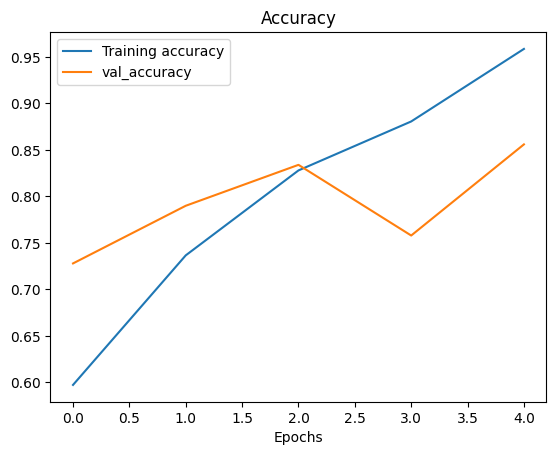

In [37]:
plot_loss_curves(history_4)